In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
# Connecting to Database¶

conn = sqlite3.connect('travel.sqlite')
cursor = conn.cursor()

In [3]:
pd.read_sql(" SELECT * FROM sqlite_master ",conn)


,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


### aircrafts_data

In [4]:
aircrafts_data = pd.read_sql_query( " SELECT * FROM aircrafts_data" , conn)
# we're using the json.loads() function to convert the JSON string in the 'model' column into a Python dictionary.
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


### airports_data

In [5]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data",conn)
airports_data['airport_name']=airports_data['airport_name'].apply(lambda x : json.loads(x)['en'])
airports_data['city']=airports_data['city'].apply(lambda x : json.loads(x)['en'])

airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,Abakan Airport,Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,Barnaul Airport,Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,Anapa Vityazevo Airport,Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


### All tables

In [6]:
boarding_passes = pd.read_sql_query(" SELECT * FROM boarding_passes" , conn)
bookings = pd.read_sql_query(" SELECT * FROM bookings" , conn)
flights = pd.read_sql_query(" SELECT * FROM flights" , conn)
seats = pd.read_sql_query(" SELECT * FROM seats" , conn)
ticket_flights = pd.read_sql_query(" SELECT * FROM ticket_flights" , conn)
tickets = pd.read_sql_query(" SELECT * FROM tickets" , conn)
flights 

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


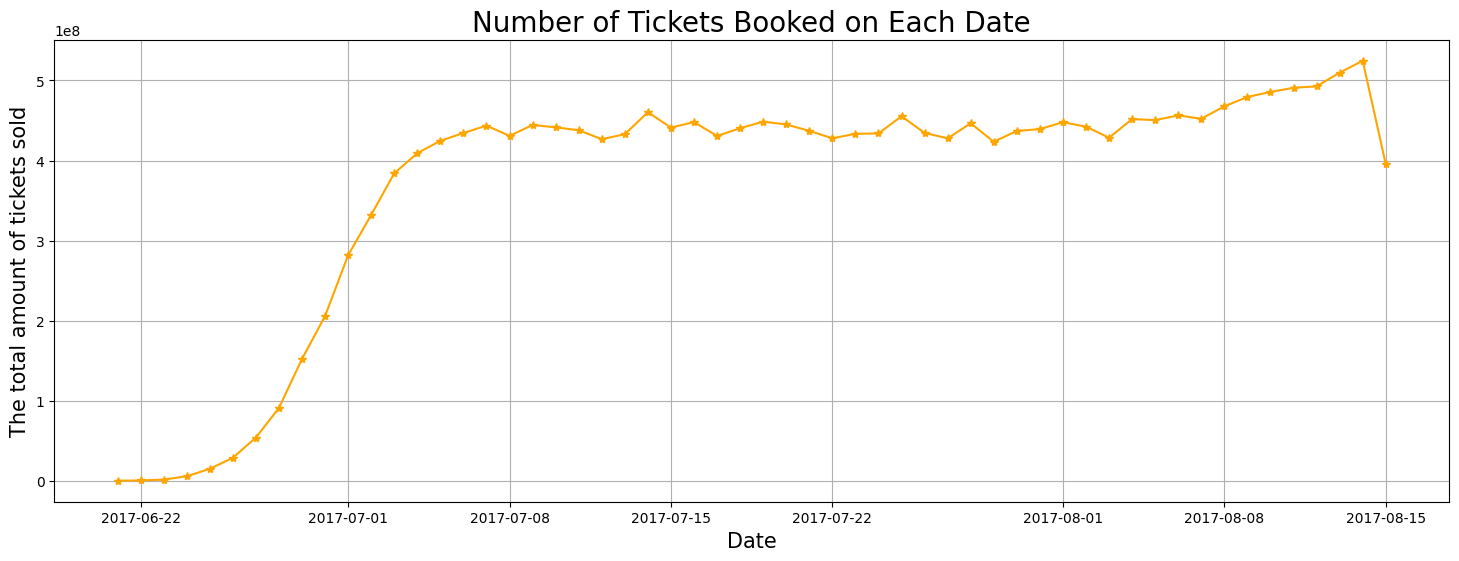

In [10]:
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date # extract just the date part from a datetime column
booking_amount = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(booking_amount.index , booking_amount['total_amount'],color = 'orange',marker = '*')
plt.xlabel('Date',fontsize=15)
plt.ylabel('The total amount of tickets sold' , fontsize=15)
plt.title('Number of Tickets Booked on Each Date', fontsize=20)
plt.grid('b')

The number of tickets booked showed an increase from June 22nd to July 7th.


### Find the most popular destination (arrival airport):



In [7]:
popular_destination = pd.read_sql_query('SELECT f.arrival_airport , COUNT(f.arrival_airport) AS flight_count\
                                        FROM flights f \
                                        GROUP BY f.arrival_airport \
                                        ORDER BY flight_count DESC \
                                        limit 5',conn)
popular_destination

,arrival_airport,flight_count
0,DME,3217
1,SVO,2982
2,LED,1902
3,VKO,1717
4,OVB,1055


### List all passengers on a specific flight:

In [8]:
passengers_30625 = pd.read_sql_query("SELECT t.passenger_id \
                                     FROM tickets t \
                                     JOIN boarding_passes b ON b.ticket_no = t.ticket_no \
                                     WHERE b.flight_id = 30625 \
                                     ", conn)
passengers_30625

,passenger_id
0,9933 118369
1,6788 033215
2,6754 366923
3,7198 737665
4,9333 855193
...,...
87,0008 757147
88,8146 986634
89,3161 238567
90,7229 283510


### Get details of passengers who have flights from a specific airport (e.g., JFK):


In [30]:
passengers_SKX = pd.read_sql_query(" SELECT t.passenger_id \
                                   FROM tickets t \
                                   JOIN boarding_passes b ON b.ticket_no=t.ticket_no \
                                   JOIN flights f ON b.flight_id=f.flight_id \
                                   WHERE f.departure_airport ='SKX' ",conn)
passengers_SKX


,passenger_id
0,9584 588230
1,7650 667561
2,3150 644171
3,4438 814379
4,2165 688003
...,...
624,4006 161055
625,0301 198075
626,2904 948103
627,2022 294522


### Rank flights based on the number of bookings:



In [14]:
rank_flight = pd.read_sql_query(" SELECT b.flight_id , COUNT(b.ticket_no) AS booking_count, \
                                Rank() OVER (ORDER BY COUNT(b.ticket_no) DESC) AS booking_rank \
                                FROM boarding_passes b \
                                JOIN tickets t ON b.ticket_no = t.ticket_no \
                                GROUP BY b.flight_id ", conn)
rank_flight

,flight_id,booking_count,booking_rank
0,9819,374,1
1,305,365,2
2,249,365,2
3,250,361,4
4,301,357,5
...,...,...,...
11513,2578,1,11400
11514,2562,1,11400
11515,1611,1,11400
11516,1304,1,11400


### Calculate the total revenue from ticket sales per flight:



In [15]:
ticket_sale = pd.read_sql_query(" SELECT tf.flight_id ,f.flight_no ,\
                                f.departure_airport , f.arrival_airport,SUM(tf.amount) AS 'Total Sales Per Flight' \
                                FROM ticket_flights tf \
                                JOIN flights f ON tf.flight_id = f.flight_id \
                                GROUP BY tf.flight_id , f.departure_airport , f.arrival_airport,f.flight_no \
                                ORDER BY SUM(amount) DESC ",conn )
ticket_sale

,flight_id,flight_no,departure_airport,arrival_airport,Total Sales Per Flight
0,2354,PG0208,DME,KHV,17146600
1,26212,PG0209,KHV,DME,17023600
2,2364,PG0208,DME,KHV,16962100
3,2330,PG0208,DME,KHV,16900600
4,2329,PG0208,DME,KHV,16894400
...,...,...,...,...,...
22221,29104,PG0254,CSY,NBC,3100
22222,29119,PG0254,CSY,NBC,3100
22223,10602,PG0295,OVB,NOZ,3000
22224,10653,PG0296,OVB,NOZ,3000


### Find the longest delay experienced by each flight:



In [ ]:
query = """
SELECT 
    flight_id,
    flight_no,
    departure_airport,
    arrival_airport,
    aircraft_code,
    strftime('%s', actual_arrival) - strftime('%s', scheduled_arrival) AS difference_in_seconds
FROM 
    flights
WHERE 
    status = 'Arrived' AND
    actual_arrival IS NOT NULL AND
    scheduled_arrival IS NOT NULL;

"""
delayed_flight = pd.read_sql_query(query, conn)
delayed_flight


,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,difference_in_seconds
0,1,PG0405,DME,LED,321,None
1,2,PG0404,DME,LED,321,None
2,3,PG0405,DME,LED,321,None
3,14,PG0402,DME,LED,321,None
4,15,PG0402,DME,LED,321,None
...,...,...,...,...,...,...
16702,33114,PG0063,SKX,SVO,CR2,None
16703,33115,PG0063,SKX,SVO,CR2,None
16704,33117,PG0063,SKX,SVO,CR2,None
16705,33118,PG0063,SKX,SVO,CR2,None


### Cancel all flights on a specific date and update their status:


In [ ]:
import sqlite3

update_query = """
    UPDATE flights
    SET status = 'Canceled'
    WHERE DATE(scheduled_departure) = '2017-08-02'
"""

# Execute the SQL query
cursor.execute(update_query)

# Commit the changes
conn.commit()

# Optionally, read the updated table into a DataFrame
select_query = "SELECT * FROM flights WHERE DATE(scheduled_departure) = '2017-08-02'"
updated_flights = pd.read_sql_query(select_query, conn)



# Display the updated DataFrame (optional)
print(updated_flights)

Empty DataFrame
Columns: [flight_id, flight_no, scheduled_departure, scheduled_arrival, departure_airport, arrival_airport, status, aircraft_code, actual_departure, actual_arrival]
Index: []


### List flights that have less than 50% of their seats booked:



In [7]:
query = """

SELECT f.flight_id, 
       CASE 
           WHEN (SELECT COUNT(bp.seat_no) AS booked_seats FROM boarding_passes bp) / 
                (SELECT COUNT(s.seat_no)  AS total_seats FROM seats s) < 0.5
           THEN 'Below 50%' 
           ELSE 'Above 50%' 
       END AS booking_status
FROM flights f;

"""

# Execute the query and read the results into a DataFrame
flights_list = pd.read_sql_query(query , conn)
flights_list

,flight_id,booking_status
0,1185,Above 50%
1,3979,Above 50%
2,4739,Above 50%
3,5502,Above 50%
4,6938,Above 50%
...,...,...
33116,33117,Above 50%
33117,33118,Above 50%
33118,33119,Above 50%
33119,33120,Above 50%


### Update the departure time of a specific flight:



In [ ]:
query = """

    UPDATE flights
    SET scheduled_departure ='2017-09-10 10:50:00+00'
    WHERE flight_id = 1185
    
"""
update_departure_time = pd.read_sql_query(query , conn)

# No result as database is locked



### Count the number of flights for each airport:



In [52]:

query = """
    SELECT departure_airport , COUNT(*) AS 'Number of flights for each airport'
    FROM flights
    GROUP BY departure_airport
    ORDER BY  "Number of flights for each airport" DESC
"""

num_flight_airport = pd.read_sql_query(query,conn)
num_flight_airport 

,departure_airport,Number of flights for each airport
0,DME,3217
1,SVO,2981
2,LED,1900
3,VKO,1719
4,OVB,1055
...,...,...
99,PYJ,27
100,NYA,27
101,PKC,26
102,USK,18


### Fare Distribution for the Flights¶


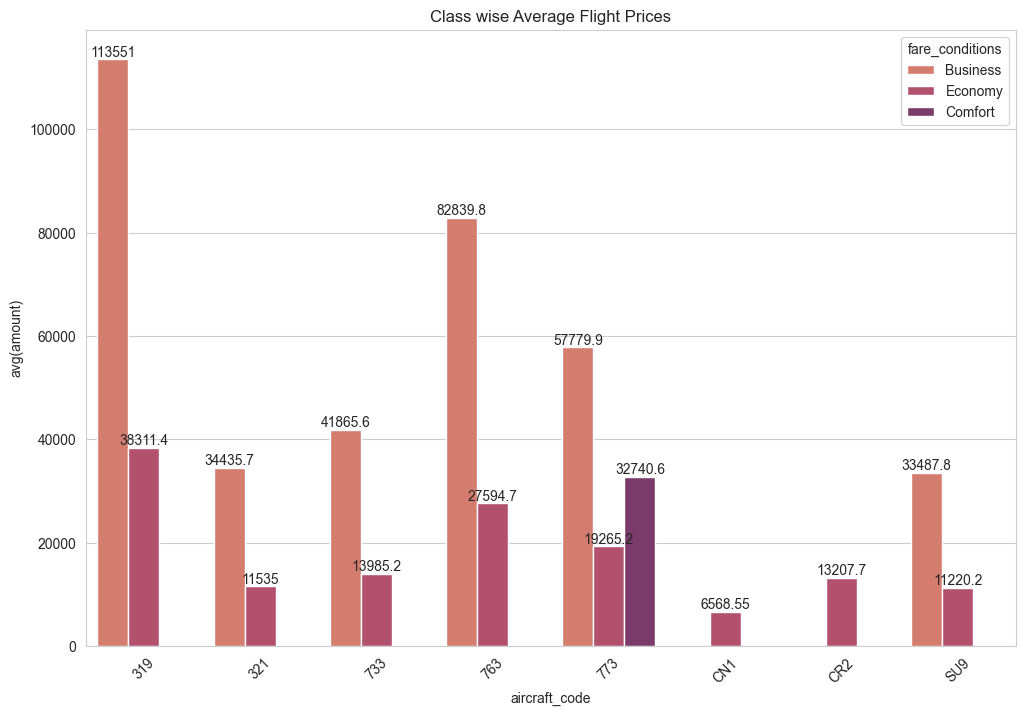

In [13]:
df = pd.read_sql_query(""" 
                        SELECT fare_conditions, aircraft_code,avg(amount) 
                        FROM ticket_flights 
                        JOIN flights ON ticket_flights.flight_id = flights.flight_id
                        GROUP BY aircraft_code, fare_conditions """, conn)

sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='avg(amount)',hue='fare_conditions', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class wise Average Flight Prices')
plt.xticks(rotation=45)
plt.show()